# Restaurant Rating Analysis & Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv("Dataset.csv")

print("Shape:", df.shape)
df.head()

Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Basic Checking

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Handle Missing Values

In [4]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Target Variable Distribution

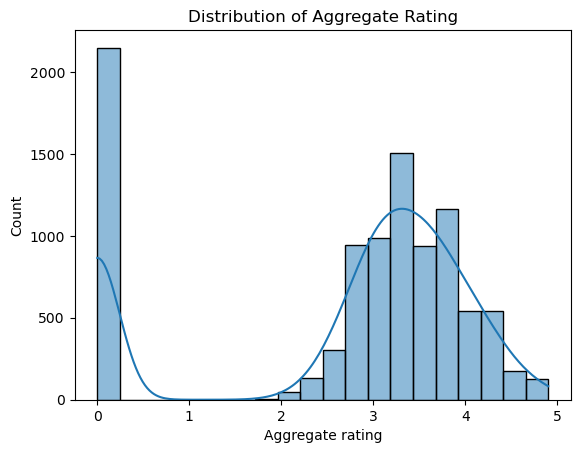

In [5]:
plt.figure()
sns.histplot(df["Aggregate rating"], bins=20, kde=True)
plt.title("Distribution of Aggregate Rating")
plt.show()

## EDA-Exploratory Data Analysis

In [6]:
print("Top Cities:")
print(df["City"].value_counts().head(10))

print("\nTop Cuisines:")
print(df["Cuisines"].value_counts().head(10))

Top Cities:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

Top Cuisines:
Cuisines
North Indian                      945
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


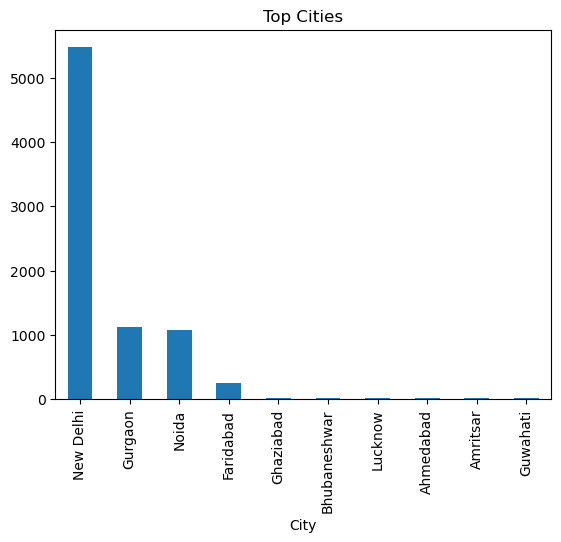

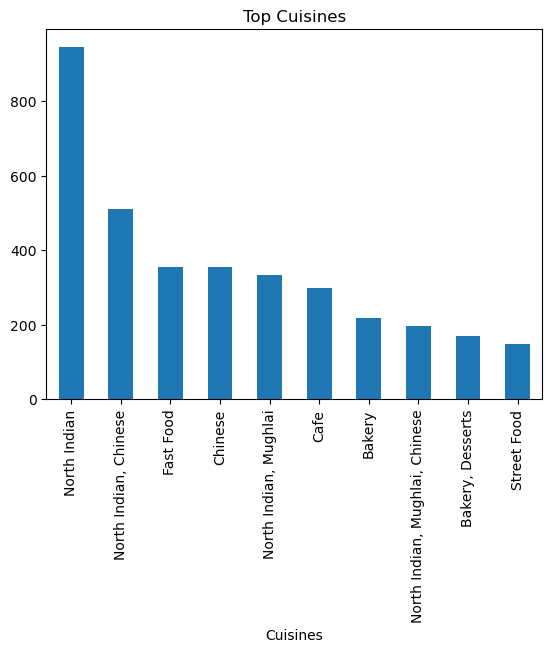

In [7]:
df["City"].value_counts().head(10).plot(kind="bar", title="Top Cities")
plt.show()

df["Cuisines"].value_counts().head(10).plot(kind="bar", title="Top Cuisines")
plt.show()

## Geospatial View

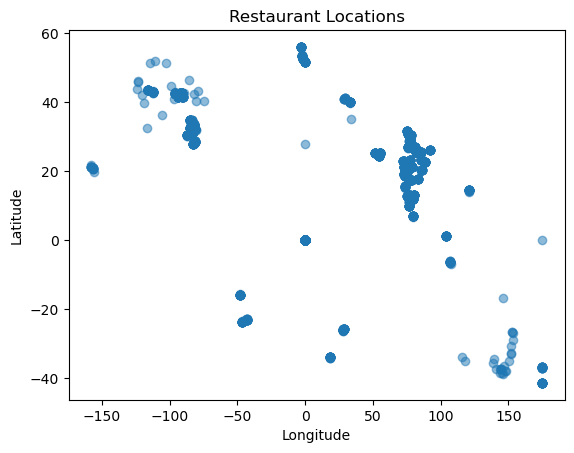

In [8]:
plt.figure()
plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations")
plt.show()

In [9]:
# Correlation between location and rating
print (df[["Latitude" , "Longitude" , "Aggregate rating"]].corr())

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


## Business Questions

In [10]:
print("Table Booking (%):")
print(df["Has Table booking"].value_counts(normalize=True) * 100)

print("\nOnline Delivery (%):")
print(df["Has Online delivery"].value_counts(normalize=True) * 100)

print("\nAvg rating with table booking:",
      df[df["Has Table booking"] == "Yes"]["Aggregate rating"].mean())

print("Avg rating without table booking:",
      df[df["Has Table booking"] == "No"]["Aggregate rating"].mean())

Table Booking (%):
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Online Delivery (%):
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

Avg rating with table booking: 3.4419689119170984
Avg rating without table booking: 2.559358989634219


## Price Range vs Rating

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


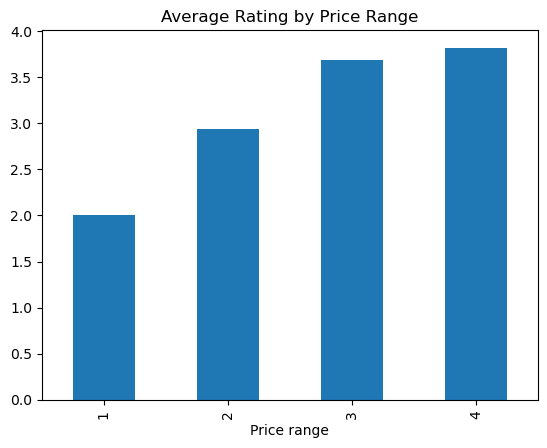

In [11]:
price_rating = df.groupby("Price range")["Aggregate rating"].mean()
print(price_rating)

price_rating.plot(kind="bar", title="Average Rating by Price Range")
plt.show()

## Feature Engineering 

In [12]:
df["Restaurant_Name_Length"] = df["Restaurant Name"].apply(len)
df["Address_Length"] = df["Address"].apply(len)

df["Has_Table_Booking_Flag"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df["Has_Online_Delivery_Flag"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_Name_Length,Address_Length,Has_Table_Booking_Flag,Has_Online_Delivery_Flag
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


## Encode Categorical Columns

In [13]:
encoder = LabelEncoder()

for col in ["City", "Cuisines", "Currency"]:
    df[col] = encoder.fit_transform(df[col])

## Prepare Data for ML

In [14]:
features = [
    "City",
    "Cuisines",
    "Average Cost for two",
    "Price range",
    "Votes",
    "Has_Table_Booking_Flag",
    "Has_Online_Delivery_Flag",
    "Restaurant_Name_Length",
    "Address_Length"
]

X = df[features]
y = df["Aggregate rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((7640, 9), (1911, 9))

# Train Models

## Linear Regression

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))

Linear Regression R2: 0.2725336519368161
Linear Regression MSE: 1.6557926949742208


## Decision Tree

In [16]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, dt_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))

Decision Tree R2: 0.917248405435085
Decision Tree MSE: 0.1883516483516484


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

# Save the model
joblib.dump(rf_model, "restaurant_rating_model.pkl")
print("Model saved as restaurant_rating_model.pkl")

Random Forest R2: 0.95867524617321
Random Forest MSE: 0.09405964370748301
Model saved as restaurant_rating_model.pkl


## Compare Models

In [18]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, dt_pred),
        r2_score(y_test, rf_pred)
    ],
    "MSE": [
        mean_squared_error(y_test, lr_pred),
        mean_squared_error(y_test, dt_pred),
        mean_squared_error(y_test, rf_pred)
    ]
})

results

,Model,R2 Score,MSE
0,Linear Regression,0.272534,1.655793
1,Decision Tree,0.917248,0.188352
2,Random Forest,0.958675,0.094060


## Final Visualization

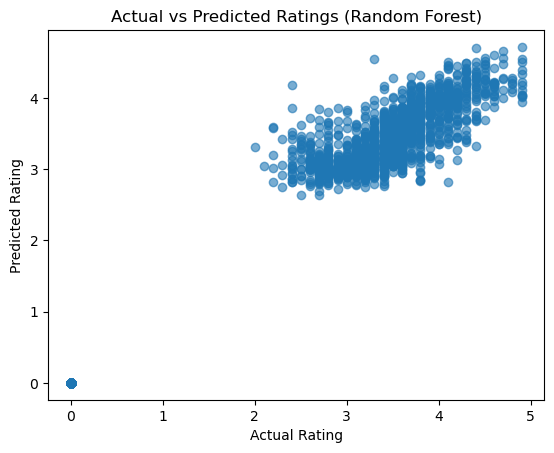

In [19]:
plt.figure()
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()

In [20]:
df[["City", "Cuisines", "Average Cost for two", "Price range","Votes"]].head(20)

,City,Cuisines,Average Cost for two,Price range,Votes
0,73,920,1100,3,314
1,73,1111,1200,3,591
2,75,1671,4000,4,270
3,75,1126,1500,4,365
4,75,1122,1500,4,229
5,75,497,1000,3,336
6,94,134,2000,4,520
7,94,1681,2000,4,677
8,94,796,6000,4,621
9,95,892,1100,3,532


## Conclusion
In this project, we performed data cleaning, exploratory data analysis, feature engineering,
and trained multiple machine learning models to predict restaurant ratings.
Among the tested models, Random Forest performed the best.
This project demonstrates a complete end-to-end data science workflow.